# **Missing Value Treatment**

In this tutorial, we will learn:

1. To mark missing values in a dataset.
2. How a machine learning algorithm can fail when it contains missing values.
3. How to remove rows that contain missing values.
4. To impute or replace missing values with sensible values.
5. How Models can be better when missing values are properly treated.

## What are **Missing Values**?

In most of the cases, real world data comes in messy or incomplete, or with some data points unable to be captured. These data points are then represented in many forms, e.g. 0, ?, etc. 


Missing values are caused by number of reasons which includes:

* Data entry errors
* Data Collection problems (e.g. unrecorded observations)
* Data corruption
* etc.

In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as **NaN**.

Here and throughout the notebook, we'll refer to missing data in general as null, NaN, or NA values.

# **Load the dataset**

In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np

# load the dataset
data = pd.read_csv('../content/pima_diabetes_dataset.csv', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,NaN,0,1,2,3,4,5.0,6.000,7,8
1,0.0,6,148,72,35,0,33.6,0.627,50,1
2,1.0,1,85,66,29,0,26.6,0.351,31,0
3,2.0,8,183,64,0,0,23.3,0.672,32,1
4,3.0,1,89,66,23,94,28.1,0.167,21,0


In [4]:
data.isnull().sum()

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [5]:
# count the number of missing values for each column
missing_numbers = (data[[1,2,3,4,5]] == 0).sum()
print(missing_numbers)

1    112
2      5
3     35
4    227
5    374
dtype: int64


In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as **NaN**.

We will be using the **replace()** function to mark values as **NaN**

In [6]:
# We will replace '0' values with 'nan'
data[[1,2,3,4,5]] = data[[1,2,3,4,5]].replace(0, np.nan)

In [7]:
# count the number of nan values in each column
data.isnull().sum()

0      1
1    112
2      5
3     35
4    227
5    374
6      0
7      0
8      0
9      0
dtype: int64

In [8]:
data.sample(5)

,0,1,2,3,4,5,6,7,8,9
47,46.0,1.0,146.0,56.0,NaN,NaN,29.7,0.564,29,0
459,458.0,10.0,148.0,84.0,48.0,237.0,37.6,1.001,51,1
12,11.0,10.0,168.0,74.0,NaN,NaN,38.0,0.537,34,1
103,102.0,NaN,125.0,96.0,NaN,NaN,22.5,0.262,21,0
13,12.0,10.0,139.0,80.0,NaN,NaN,27.1,1.441,57,0


### **Visualise the Missing Data**
The MissingNo (Missing Number) package is used for graphical analysis of Missing data

In [9]:
# !pip install missingno

<AxesSubplot:>

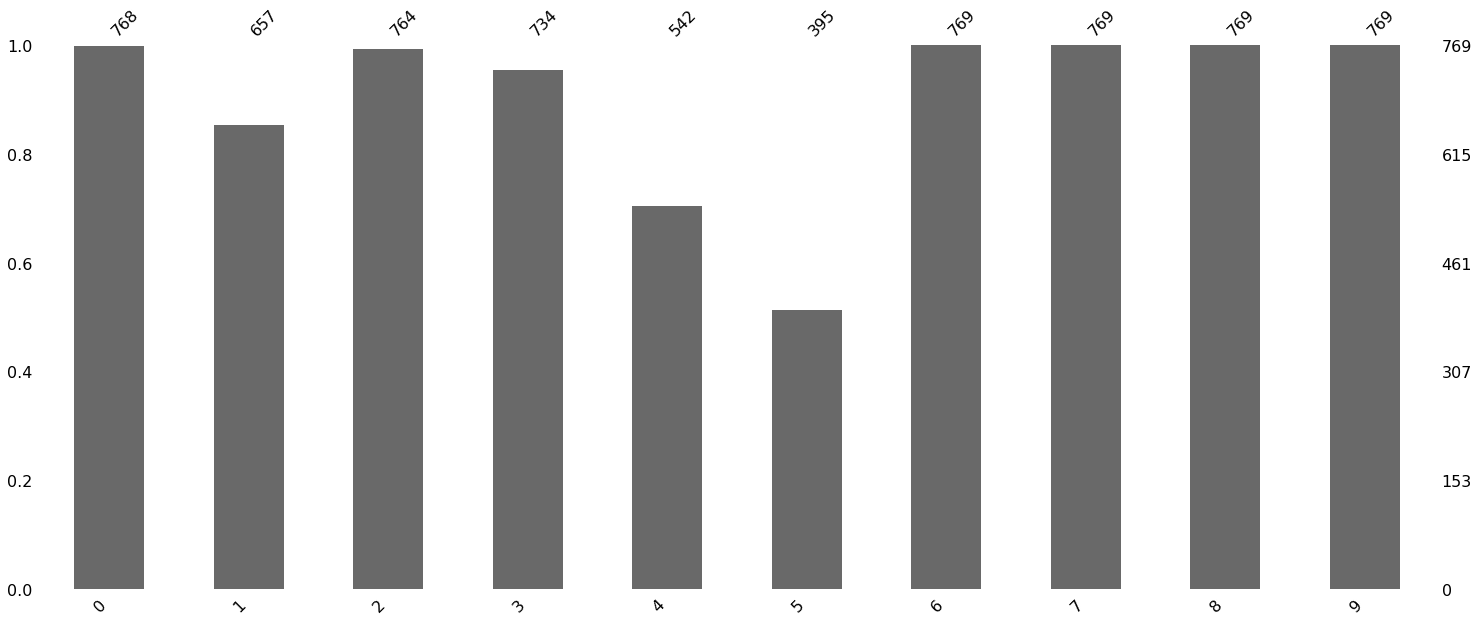

In [10]:
import missingno as msno 
msno.bar(data)

## Why do we need to deal with Missing Values?

Although there are some algorithms that do work with dataset containing missing values, there are quite a number of them that do not work on datasets with missing values.

We will prove this using the **Linear Discriminant Analysis (LDA)** algorithm on the dataset with missing values.



In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

values = data.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# train the model
model.fit_transform(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<br>

As we can see from above, the **Linear Discriminant Analysis (LDA)** algorithm does not work on the dataset with missing values. It points to the fact that there are NaN or missing values present

# **Dealing With Missing Values**

## 1. Dropping the Rows or Columns with Missing Values

Pandas provides the dropna() function that can be used to drop either columns or rows with missing data. We can use dropna() to remove all rows with missing data, as follows:

In [12]:
print('Shape of dataset Before droping NaN:',data.shape)

data.dropna(inplace=True)

print('Shape of dataset After droping NaN:',data.shape)

Shape of dataset Before droping NaN: (769, 10)
Shape of dataset After droping NaN: (336, 10)


Now let's try our new dataset with no Missing values on **Linear Discriminant Analysis (LDA)** algorithm 

In [13]:
values = data.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# train the model
model.fit_transform(X, y)
print("There is no error after dropping nan values")

There is no error after dropping nan values


## **Impute Missing Values**

We can impute Missing Values using several strategies. Below is just a few of the common means:

1. A meaningful constant value in the domain, such as 0 which is distinct from all other values.
2. A mean, median or mode value for the column.
3. A value from another randomly selected record.
4. A value estimated by another predictive model.

### Filling the Missing Values with a Central Tendency(Mean,Median, Mode)

<AxesSubplot:>

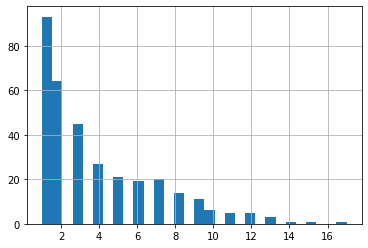

In [14]:
data[1].hist(bins=30)

<AxesSubplot:>

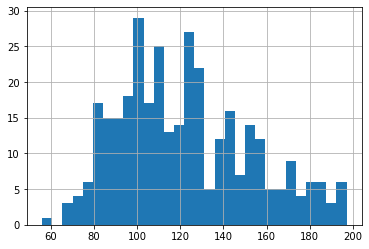

In [15]:
data[2].hist(bins=30)

<AxesSubplot:>

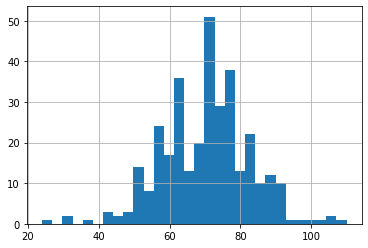

In [16]:
data[3].hist(bins=30)

<AxesSubplot:>

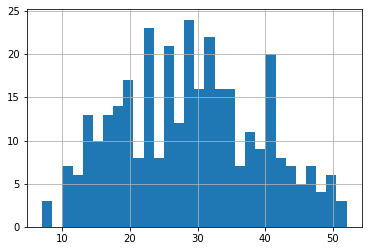

In [17]:
data[4].hist(bins=30)

<AxesSubplot:>

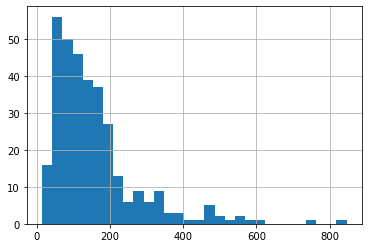

In [18]:
data[5].hist(bins=30)

In order to deal with the missing values appropriatly, it's important to know the distribution of the column as well as the skewness.

Let's see below how outliers and skewness are important in dealing with missing values.

In [19]:
#data is uniformly distributed. i.e. mean=median=mode
a = [25, 27, 27, 29,26] #normaly distributed

In [20]:
import statistics as stats
print(np.mean(a))
print(stats.mode(a))
print(stats.median(a))

26.8
27
27


In [21]:
#data is skewed and not uniformly distributed. i.e mean> both mode and median
a=[25, 27, 27, 29,95] #skewed

In [22]:
# left skewed 
print(np.mean(a))
print(stats.mode(a))
print(stats.median(a))

40.6
27
27


Since the numerical features in our dataset are not uniformly distributed(not Gausian), we will therefore be using the mode to fill the missing values which will be a good represntation of our dataset.




**column 1**

In [23]:
# fill missing values with mode column values
# 1.column is right skewed so fill it by mode
data[1].fillna(data[1].mode(), inplace=True)

# count the number of NaN values in each column

print(data[1].isnull().sum())

0


**Column 2**

In [24]:
#@title
# fill missing values with mean column values
# 2.column is also not normally distributed..
data[2].fillna(data[2].mode(), inplace=True)

# count the number of NaN values in each column

print(data[2].isnull().sum())

0


**Column 3**

In [25]:
# fill missing values with mean column values
# 3. column like normally dist and continue by mean.
data[3].fillna(data[3].mean(), inplace=True)

# count the number of NaN values in each column

print(data[3].isnull().sum())

0


**Column 4**

In [26]:
# fill missing values with mean column values
# 4. column like normally dist and continue by mean.
data[4].fillna(data[4].mean(), inplace=True)

# count the number of NaN values in each column

print(data[4].isnull().sum())

0


**Column 5**

In [27]:
# fill missing values with mean column values
# 5.column is right skewed so fill it by mode
data[5].fillna(data[5].mode(), inplace=True)

# count the number of NaN values in each column

print(data[5].isnull().sum())

0


In [28]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

## Using Scikit-learn's SimpleImputer

In [29]:
from sklearn.impute import SimpleImputer

# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % np.isnan(transformed_values).sum())

Missing: 0


Let's again to see if this time we can use our dataset to build algorithm on **Linear Discriminant Analysis (LDA)** algorithm 


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

df = pd.read_csv('../content/pima_diabetes_dataset.csv', header=None)
# mark zero values as missing or NaN
df = df.replace(0, np.nan)
# split dataset into inputs and outputs
values = df.values
x = values[:,0:8]
y = values[:,8]
# define the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# define the model
lr = LinearRegression()
# define the modeling pipeline
pipeline = Pipeline(steps=[('imputer', imputer),('model', lr)])

# evaluate the model
result = cross_val_score(pipeline, x, y, cv=5, scoring='r2')
# report the mean performance
print('Accuracy: %.2f' % result.mean())

Accuracy: 0.33


<hr/>